In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

In [2]:
df = pd.read_csv('Gaming_Data_Cleaned_Draft1')
df = df.drop(columns='Unnamed: 0')

In [3]:
df.head()

,Game Title,Weekly Sales,All Time Sales,Weeks Out,Genre,Console,Publisher,Count
0,Pokemon Sun/Moon,312949,12347479,8,Role-Playing,3DS,Nintendo,709
1,Grand Theft Auto V,162293,13692364,112,Action,PS4,Take-Two Interactive,307
2,Super Mario Maker,147107,1979933,6,Platform,3DS,Nintendo,709
3,FIFA 17,138161,9719745,15,Sports,PS4,Electronic Arts,381
4,Call of Duty: Infinite Warfare,134299,6329596,10,Shooter,PS4,Activision,294


In [4]:
df = df.rename(columns={'Game Title':'Game_Title', 'Weekly Sales': 'Weekly_Sales', 'All Time Sales': 'All_Time_Sales',
                        'Weeks Out': 'Weeks_Out'})

In [5]:
pub_dummies = pd.get_dummies(df["Publisher"], prefix="pub")
gen_dummies = pd.get_dummies(df["Genre"], prefix="gen")
con_dummies = pd.get_dummies(df["Console"], prefix="con")

In [6]:
df = pd.concat([df, pub_dummies, gen_dummies, con_dummies], axis=1)
df.head()

,Game_Title,Weekly_Sales,All_Time_Sales,Weeks_Out,Genre,Console,Publisher,Count,pub_505 Games,pub_Activision,...,gen_Strategy,con_3DS,con_NS,con_PC,con_PS3,con_PS4,con_PSV,con_WiiU,con_X360,con_XOne
0,Pokemon Sun/Moon,312949,12347479,8,Role-Playing,3DS,Nintendo,709,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Grand Theft Auto V,162293,13692364,112,Action,PS4,Take-Two Interactive,307,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Super Mario Maker,147107,1979933,6,Platform,3DS,Nintendo,709,0,0,...,0,1,0,0,0,0,0,0,0,0
3,FIFA 17,138161,9719745,15,Sports,PS4,Electronic Arts,381,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Call of Duty: Infinite Warfare,134299,6329596,10,Shooter,PS4,Activision,294,0,1,...,0,0,0,0,0,1,0,0,0,0


In [7]:
#need to change column names for the dummy publishers because of spaces
cleaned_dummies = []
for names in list(df.columns)[5:]:
    cleaned_dummies.append(names.replace(' ', '_'))
    
dict(zip(list(df.columns[5:]), cleaned_dummies))

{'Console': 'Console',
 'Publisher': 'Publisher',
 'Count': 'Count',
 'pub_505 Games': 'pub_505_Games',
 'pub_Activision': 'pub_Activision',
 'pub_Atlus': 'pub_Atlus',
 'pub_Bandai Namco Entertainment': 'pub_Bandai_Namco_Entertainment',
 'pub_Bethesda Softworks': 'pub_Bethesda_Softworks',
 'pub_Capcom': 'pub_Capcom',
 'pub_Codemasters': 'pub_Codemasters',
 'pub_Deep Silver': 'pub_Deep_Silver',
 'pub_Electronic Arts': 'pub_Electronic_Arts',
 'pub_Focus Home Interactive': 'pub_Focus_Home_Interactive',
 'pub_Frontier Developments': 'pub_Frontier_Developments',
 'pub_Gearbox Software': 'pub_Gearbox_Software',
 'pub_Koch Media': 'pub_Koch_Media',
 'pub_Konami Digital Entertainment': 'pub_Konami_Digital_Entertainment',
 'pub_Level 5': 'pub_Level_5',
 'pub_Maximum Games': 'pub_Maximum_Games',
 'pub_Microsoft Game Studios': 'pub_Microsoft_Game_Studios',
 'pub_Microsoft Studios': 'pub_Microsoft_Studios',
 'pub_Mojang': 'pub_Mojang',
 'pub_Namco Bandai Games': 'pub_Namco_Bandai_Games',
 'pub_Nin

In [8]:
df = df.rename(columns={'pub_505 Games': 'pub_505_Games',
 'pub_Activision': 'pub_Activision',
 'pub_Atlus': 'pub_Atlus',
 'pub_Bandai Namco Entertainment': 'pub_Bandai_Namco_Entertainment',
 'pub_Bethesda Softworks': 'pub_Bethesda_Softworks',
 'pub_Capcom': 'pub_Capcom',
 'pub_Codemasters': 'pub_Codemasters',
 'pub_Deep Silver': 'pub_Deep_Silver',
 'pub_Electronic Arts': 'pub_Electronic_Arts',
 'pub_Focus Home Interactive': 'pub_Focus_Home_Interactive',
 'pub_Frontier Developments': 'pub_Frontier_Developments',
 'pub_Gearbox Software': 'pub_Gearbox_Software',
 'pub_Koch Media': 'pub_Koch_Media',
 'pub_Konami Digital Entertainment': 'pub_Konami_Digital_Entertainment',
 'pub_Level 5': 'pub_Level_5',
 'pub_Maximum Games': 'pub_Maximum_Games',
 'pub_Microsoft Game Studios': 'pub_Microsoft_Game_Studios',
 'pub_Microsoft Studios': 'pub_Microsoft_Studios',
 'pub_Mojang': 'pub_Mojang',
 'pub_Namco Bandai Games': 'pub_Namco_Bandai_Games',
 'pub_Nintendo': 'pub_Nintendo',
 'pub_Rebellion Developments': 'pub_Rebellion_Developments',
 'pub_Sega': 'pub_Sega',
 'pub_Sony Computer Entertainment': 'pub_Sony_Computer_Entertainment',
 'pub_Sony Interactive Entertainment': 'pub_Sony_Interactive_Entertainment',
 'pub_Square Enix': 'pub_Square_Enix',
 'pub_Studio Wildcard': 'pub_Studio_Wildcard',
 'pub_Take-Two Interactive': 'pub_TakeTwo_Interactive',
 'pub_Tecmo Koei': 'pub_Tecmo_Koei',
 'pub_Ubisoft': 'pub_Ubisoft',
 'pub_Warner Bros. Interactive Entertainment': 'pub_Warner_Bros_Interactive_Entertainment',
 'gen_Action': 'gen_Action',
 'gen_Action-Adventure': 'gen_ActionAdventure',
 'gen_Adventure': 'gen_Adventure',
 'gen_Fighting': 'gen_Fighting',
 'gen_MMO': 'gen_MMO',
 'gen_Misc': 'gen_Misc',
 'gen_Music': 'gen_Music',
 'gen_Party': 'gen_Party',
 'gen_Platform': 'gen_Platform',
 'gen_Puzzle': 'gen_Puzzle',
 'gen_Racing': 'gen_Racing',
 'gen_Role-Playing': 'gen_RolePlaying',
 'gen_Sandbox': 'gen_Sandbox',
 'gen_Shooter': 'gen_Shooter',
 'gen_Simulation': 'gen_Simulation',
 'gen_Sports': 'gen_Sports',
 'gen_Strategy': 'gen_Strategy',
 'con_3DS': 'con_3DS',
 'con_NS': 'con_NS',
 'con_PC': 'con_PC',
 'con_PS3': 'con_PS3',
 'con_PS4': 'con_PS4',
 'con_PSV': 'con_PSV',
 'con_WiiU': 'con_WiiU',
 'con_X360': 'con_X360',
 'con_XOne': 'con_XOne'})

In [9]:
dummy = ''
for names in cleaned_dummies:
    dummy += names
    dummy += '+'
dummy

'Console+Publisher+Count+pub_505_Games+pub_Activision+pub_Atlus+pub_Bandai_Namco_Entertainment+pub_Bethesda_Softworks+pub_Capcom+pub_Codemasters+pub_Deep_Silver+pub_Electronic_Arts+pub_Focus_Home_Interactive+pub_Frontier_Developments+pub_Gearbox_Software+pub_Koch_Media+pub_Konami_Digital_Entertainment+pub_Level_5+pub_Maximum_Games+pub_Microsoft_Game_Studios+pub_Microsoft_Studios+pub_Mojang+pub_Namco_Bandai_Games+pub_Nintendo+pub_Rebellion_Developments+pub_Sega+pub_Sony_Computer_Entertainment+pub_Sony_Interactive_Entertainment+pub_Square_Enix+pub_Studio_Wildcard+pub_Take-Two_Interactive+pub_Tecmo_Koei+pub_Ubisoft+pub_Warner_Bros._Interactive_Entertainment+gen_Action+gen_Action-Adventure+gen_Adventure+gen_Fighting+gen_MMO+gen_Misc+gen_Music+gen_Party+gen_Platform+gen_Puzzle+gen_Racing+gen_Role-Playing+gen_Sandbox+gen_Shooter+gen_Simulation+gen_Sports+gen_Strategy+con_3DS+con_NS+con_PC+con_PS3+con_PS4+con_PSV+con_WiiU+con_X360+con_XOne+'

In [10]:
form = ('All_Time_Sales~Weeks_Out+Weekly_Sales+pub_505_Games+pub_Activision+pub_Bandai_Namco_Entertainment+pub_Bethesda_Softworks+pub_Capcom+pub_Codemasters+pub_Deep_Silver+pub_Electronic_Arts+pub_Focus_Home_Interactive+pub_Gearbox_Software+pub_Koch_Media+pub_Konami_Digital_Entertainment+pub_Level_5+pub_Maximum_Games+pub_Microsoft_Game_Studios+pub_Microsoft_Studios+pub_Mojang+pub_Namco_Bandai_Games+pub_Nintendo+pub_Rebellion_Developments+pub_Sega+pub_Sony_Computer_Entertainment+pub_Sony_Interactive_Entertainment+pub_TakeTwo_Interactive+pub_Tecmo_Koei+pub_Ubisoft+pub_Warner_Bros_Interactive_Entertainment+gen_Action+gen_Action-Adventure+gen_Adventure+gen_Fighting+gen_MMO+gen_Misc+gen_Puzzle+gen_Racing+gen_RolePlaying+gen_Sandbox+gen_Shooter+gen_Simulation+gen_Sports+gen_Strategy+con_3DS+con_PC+con_PS3+con_PS4+con_XOne')




# Most of my data was clumped around the first few weeks of release. To look at longevity of sales, I cut out that time period

In [18]:
df = df[df['Weeks_Out'] >= 25]

In [12]:
df = df[df['Weeks_Out'] <= 250]

In [19]:
lr_model = ols(formula=form, data=df).fit()

In [20]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         All_Time_Sales   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     71.74
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          2.07e-238
Time:                        09:34:56   Log-Likelihood:                -15758.
No. Observations:                 978   AIC:                         3.159e+04
Df Residuals:                     942   BIC:                         3.176e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                 -6.827e+06   1.04e+06     -6.564      0.000   -8.87e+06   -4.79e+06
Weeks_Out                                  4.491e+04   3154.594     14.237      0.000    3.87e+04    5.11e+04
Weekly_Sales                                  3.2794      1.457      2.251      0.025       0.420       6.139
pub_505_Games                              2.932e+06   2.65e+06      1.106      0.269   -2.27e+06    8.13e+06
pub_Activision                             8.349e+06    9.5e+05      8.792      0.000    6.49e+06    1.02e+07
pub_Bandai_Namco_Entertainment             -3.08e-08   1.14e-08     -2.712      0.007   -5.31e-08   -8.52e-09
pub_Bethesda_Softworks                     3.024e+06    8.1e+05      3.733      0.000    1.43e+06    4.61e+06
pub_Capcom                                 7.505e+05   1.12e+06      0.668      0.504   -1.46e+06    2.96e+06
pub_Codemasters                            7.007e-09   1.86e-09      3.773      0.000    3.36e-09    1.07e-08
pub_Deep_Silver                            2.622e+05   1.01e+06      0.260      0.795   -1.72e+06    2.24e+06
pub_Electronic_Arts                        1.091e+07   9.92e+05     10.989      0.000    8.96e+06    1.29e+07
pub_Focus_Home_Interactive                 1.346e-08   5.36e-09      2.509      0.012    2.93e-09     2.4e-08
pub_Gearbox_Software                       7.193e+05   1.45e+06      0.496      0.620   -2.13e+06    3.56e+06
pub_Koch_Media                             6.104e-09   2.28e-09      2.680      0.007    1.64e-09    1.06e-08
pub_Konami_Digital_Entertainment          -9.292e-09   1.87e-09     -4.976      0.000    -1.3e-08   -5.63e-09
pub_Level_5                               -7.681e+05   2.68e+06     -0.287      0.775   -6.03e+06    4.49e+06
pub_Maximum_Games                          3.057e-09   3.61e-09      0.846      0.398   -4.03e-09    1.01e-08
pub_Microsoft_Game_Studios                 1.128e+07   1.43e+06      7.890      0.000    8.47e+06    1.41e+07
pub_Microsoft_Studios                       1.07e+07   1.06e+06     10.134      0.000    8.63e+06    1.28e+07
pub_Mojang                                 3.393e+06   8.04e+05      4.219      0.000    1.82e+06    4.97e+06
pub_Namco_Bandai_Games                     7.271e+05   1.24e+06      0.585      0.559   -1.71e+06    3.17e+06
pub_Nintendo                               1.105e+07   1.02e+06     10.841      0.000    9.05e+06     1.3e+07
pub_Rebellion_Developments                -7.909e-10   1.12e-09     -0.709      0.479   -2.98e-09     1.4e-09
pub_Sega                                   6.391e+05   1.49e+06      0.428      0.669   -2.29e+06    3.57e+06
pub_Sony_Computer_Entertainment            5.516e+06   1.08e+06      5.119      0.000     3.4e+06    7.63e+06
pub

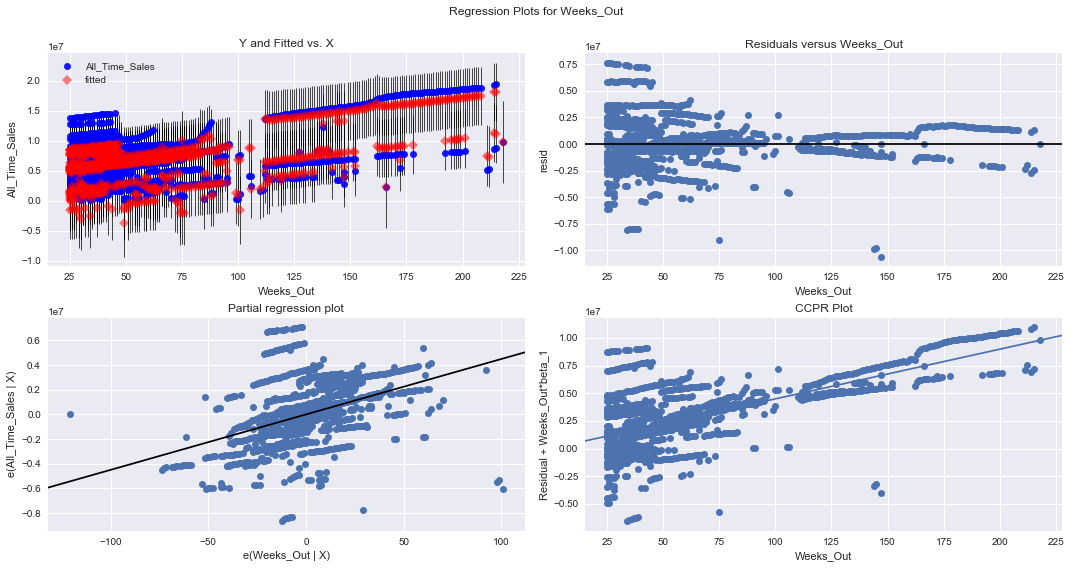

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(lr_model, "Weeks_Out", fig=fig)
plt.show()

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


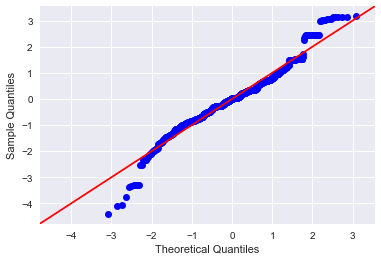

In [22]:
import scipy.stats as stats
residuals = lr_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Text(0.5, 1.0, 'Linearity Check')

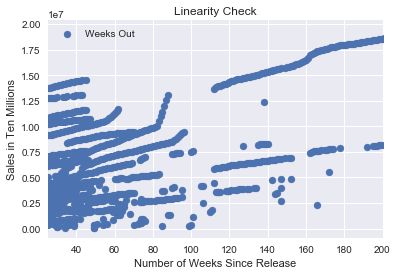

In [23]:
plt.scatter(df.Weeks_Out,df.All_Time_Sales, label = 'Weeks Out');
plt.legend();
plt.xlabel('Number of Weeks Since Release')
plt.ylabel('Sales in Ten Millions')
plt.xlim(25, 200)
plt.title('Linearity Check')